## MountainCar – Manual Solution Exploration and Manually Driven

### The implementation of the manual mountain car, actually sets up a manual control environment for the MountainCar-v0 problem using OpenAI Gymnasium. As this helps me to interacts with the environment using predefined keys (a, s, and d), and the program logs the position and velocity at intervals

### Source: https://gymnasium.farama.org/environments/classic_control/mountain_car/

In [1]:
# importing the necessary libraries module
# import gymnasium 
# play module: does allows real-time user interaction with the environment.
import gymnasium as gym
from gymnasium.utils import play
import numpy as np
import os
#import matplotlib.pyplot as plt
#import time
#from IPython.display import clear_output

### Version 1: setting upm the mountain car environment- Defining Actions and Key Mappings

In [2]:
# create the mountain car environment
# env = gym.make 'MountainCar-v0': initializes the
# MountainCar environment
# render_mode="rgb_array": Ensures rendering is done in RGB format
# max_episode_steps=-1: allows unlimited steps in the environment.
env = gym.make('MountainCar-v0', render_mode="rgb_array", max_episode_steps=-1)

# There are 3 discrete deterministic actions:
# 0: Accelerate to the left
# 1: Don’t accelerate (car slows due to gravity).
# 2: Accelerate to the right

action_keys = {
    "a": 0,
    "s": 1,
    "d": 2
}

# counter = 0

play.play(env, fps=30, keys_to_action = action_keys, wait_on_player=False, noop=1)

### Version 2: This keeps track of current values each time the game is played

In [ ]:
# create the mountain car environment
env = gym.make('MountainCar-v0', render_mode="rgb_array", max_episode_steps=-1)

# There are 3 discrete deterministic actions:
# 0: Accelerate to the left
# 1: Don’t accelerate
# 2: Accelerate to the right

# map the keys
action_keys = {
    "a": 0,
    "s": 1, 
    "d": 2
}

counter = 0

# to see a little bit of the values while we play
# we'll have a custom logging callback
def custom_callback(*args, **kwargs):
    action = args[2]
    position = args[0][0]
    velocity = args[0][1]
    done = args[4]
    global counter

    if counter % 30 == 0:
        print(f"Position: {position} - Velocity {velocity}")
        counter = 0

    counter += 1



# noop = no operation, which key means "do nothing"
play.play(env, fps=30, keys_to_action=action_keys, wait_on_player=False, noop=1, callback=custom_callback)

Position: [-0.55310833  0.        ] - Velocity {}
Position: -0.49768614768981934 - Velocity 0.0013229717733338475
Position: -0.5384339094161987 - Velocity -0.0022645925637334585
Position: -0.5241260528564453 - Velocity 0.0025523805525153875
Position: -0.5078613758087158 - Velocity -0.0021027575712651014
Position: -0.5500008463859558 - Velocity 0.0010462318314239383
Position: -0.49415361881256104 - Velocity 0.0003117788874078542
Position: -0.5475887060165405 - Velocity -0.0015799894463270903
Position: -0.5119903683662415 - Velocity 0.002392600057646632
Position: -0.5194723606109619 - Velocity -0.0025142228696495295
Position: -0.5422678589820862 - Velocity 0.0019095254829153419
Position: -0.4957785904407501 - Velocity -0.0007539012003690004
Position: -0.5525398850440979 - Velocity -0.0006189144914969802
Position: -0.5018898844718933 - Velocity 0.001813442911952734
Position: -0.5318069458007812 - Velocity -0.002484855242073536
Position: -0.5312625765800476 - Velocity 0.0024384816642850637

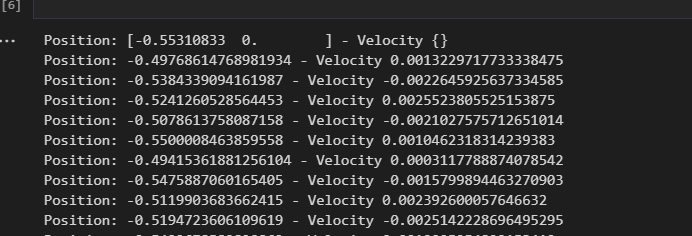

#### Firstly, the velocity is zero which indicated that there was no momentium and then as the car moves forward from the position -0.55 to -0.49 the velocity changes from empty (0) to 0.001322 which indicated the car moved in positive direction (to the right). Again, the car swing or moved back to -0.538 which the velocity decreased showing the car moved to the left.
#### I observed, that the car oscillates between left and right as velocity changes. And when the velocity value is a positively high the car accelerated strongly to the right. Also high negative value shown that the car moved strongly to the left and when the values are pretty close to zero which indicated that perhaps there was a near stopping of the car.

#### Conclusively, I noticed its difficult to drive the car to the mountain top (flag) manually as the mapping action key (d) has to be pressed like 3 times. This is done to build up momentum and that is the only way the car can get to the top. Again, the challenge now is packing the car right on top of the flag because fine-tuning acceleration is difficult as velocity fluctuates based on acceleration and gravity.
#### So, I think solving it manually kind of hard due to momentum-based movement, so a reinforcement learning agent would optimize acceleration much more better